# Flower type prediction using Iris dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
X= pd.DataFrame(iris.data, columns=iris.feature_names)
y= iris.target

In [4]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Create and train logistic regression model

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=5)

In [47]:
model = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

### Measure accuracy of our model

In [48]:
model.score(X_test, y_test)

0.9666666666666667

In [49]:
# more accurate accuracy
# cross_val_score() is an alternative and short form of KFold()

scores = cross_val_score(LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000),X_train, y_train)
scores

array([1.        , 0.95833333, 0.95833333, 0.95833333, 0.95833333])

In [50]:
scores.mean()

0.9666666666666668

### Confusion Matrix

In [51]:
y_predicted = model.predict(X_test)

In [52]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]], dtype=int64)

<AxesSubplot:>

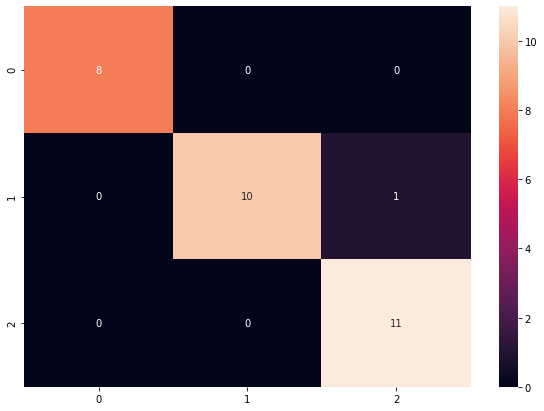

In [53]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)

## Create and train Random Forest Classifier model

In [54]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
cross_val_score(RandomForestClassifier(),X_train, y_train).mean()

0.9583333333333334

<AxesSubplot:>

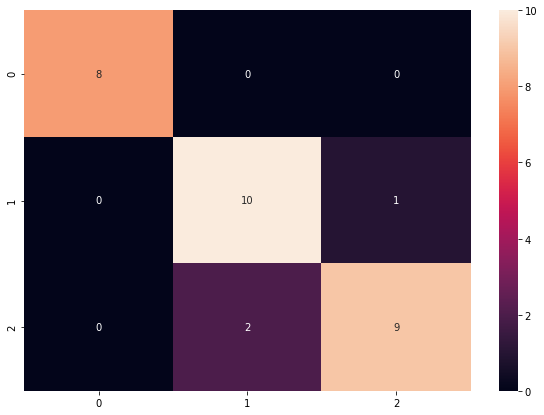

In [56]:
cm = confusion_matrix(y_test, model.predict(X_test))
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)